In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train[0].shape

(28, 28)

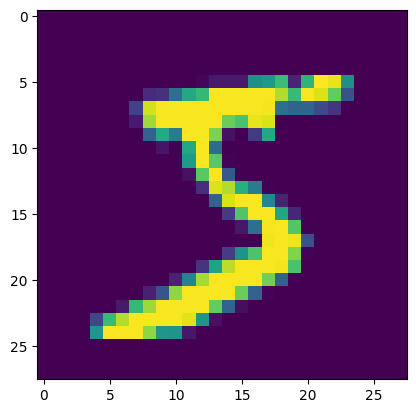

In [8]:
plt.imshow(X_train[0])

In [9]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation='sigmoid')
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8160 - loss: 0.5948
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9182 - loss: 0.2924
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9336 - loss: 0.2379
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9416 - loss: 0.2093
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9471 - loss: 0.1923
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9491 - loss: 0.1806
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9538 - loss: 0.1661
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9549 - loss: 0.1618
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9566 - loss: 0.1537
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9562 - loss: 0.1490
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9583 - loss: 0.1431
Epoch 12/20
1875/1875 ━━━━━━━━

In [24]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9738 - loss: 0.0990
0.973800003528595


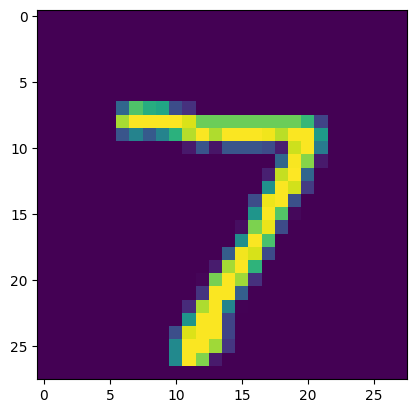

In [25]:
plt.imshow(X_test[0])

In [26]:
print(Y_test[0])

7


In [27]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


In [28]:
Y_pred[0]

array([4.1657090e-04, 2.0734347e-02, 4.9313862e-02, 7.7065235e-01,
       1.6266181e-01, 8.2185670e-06, 2.8571744e-06, 9.9999982e-01,
       1.0252896e-04, 1.7465888e-02], dtype=float32)

In [29]:
result = np.argmax(Y_pred[0])
result

np.int64(7)

In [32]:
Y_pred_max = np.argmax(Y_pred,axis=1)

In [33]:
confusionMatrix = confusion_matrix(Y_test,Y_pred_max)
confusionMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    2,    0,    0,    1,    1,    3,    0],
       [   0, 1119,    3,    2,    0,    1,    1,    4,    5,    0],
       [   5,    0, 1000,    5,    3,    1,    1,    8,    9,    0],
       [   0,    0,    5,  987,    0,    9,    0,    6,    3,    0],
       [   1,    0,    4,    0,  958,    0,    3,    0,    3,   13],
       [   3,    0,    0,   13,    2,  863,    2,    0,    6,    3],
       [   6,    2,    2,    0,    7,    7,  930,    0,    4,    0],
       [   1,    0,   13,    4,    1,    0,    0, 1000,    1,    8],
       [   6,    2,    4,    7,    5,    3,    3,    3,  936,    5],
       [   1,    3,    1,    4,   11,   10,    0,    3,    1,  975]],
      dtype=int32)>

Text(0.5, 69.7222222222222, 'Predicted La')

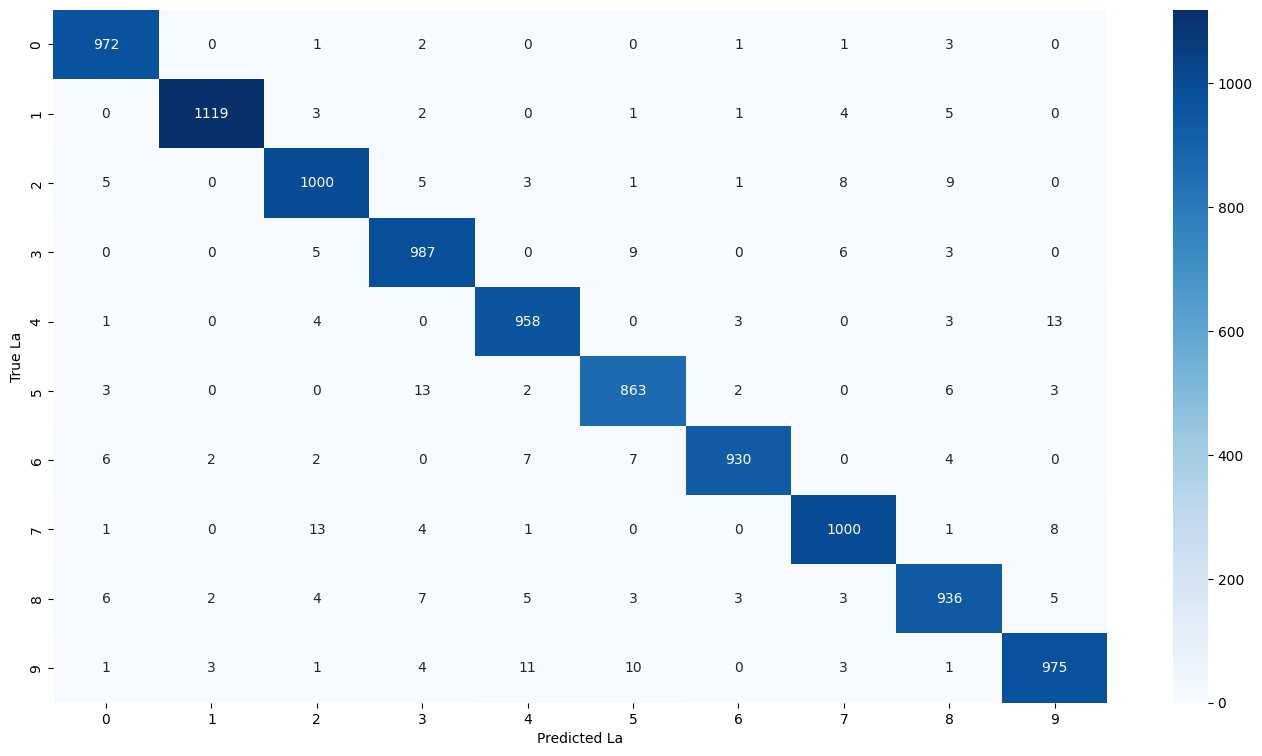

In [34]:
plt.figure(figsize=(17,9))
sns.heatmap(confusionMatrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True La')
plt.xlabel('Predicted La')